# 8장 자연어 처리하기

### 8-1 한글 자연어 처리 기초 -KoNLPy 및 필요 모듈의 설치

한글 자연어 처리를 파이썬으로 하는 것을 도와주는 모듈은 Lucy Park이라는 분이 개발한 KoNLPy 모듈이 필수입니다. 꼭 블로그를 방문해서 탄탄한 기초를 받길바란다.

### 8-2 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사 분석도 가능

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

형태소 분석도 수행합니다.

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번에는 트위터 분석

In [9]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\student\Anaconda3\envs\camp\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

### 8-3 워드 클라우드

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [16]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

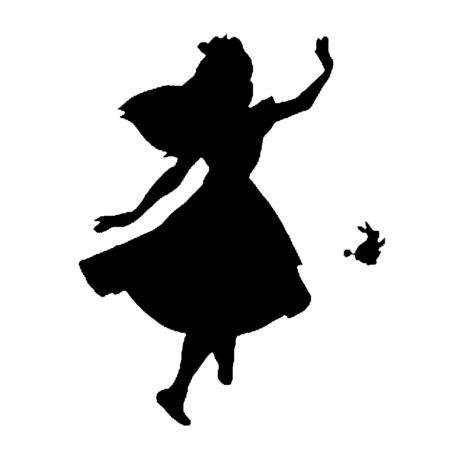

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wc = WordCloud(background_color='white', max_words=2000,mask=alice_mask,stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

위는 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해서 최빈단어를 찾는 것이다.

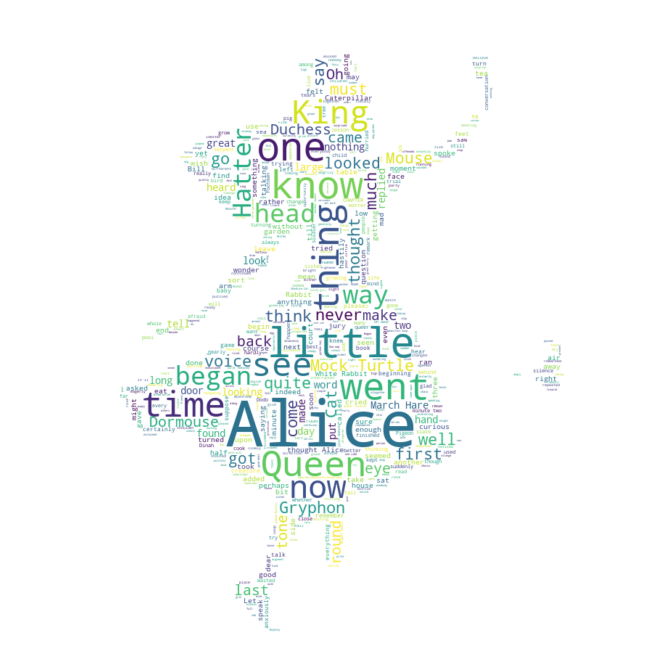

In [20]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

시각적 효과가 괜찮아 보인다. 그 다음은 스타워즈의 A New Hope 텍스트이다.

In [21]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN','han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [22]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

특수하게 처리해야할 단어를 처리한다. 그리고 워드 클라우드를 준비한다.

In [23]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

이번에는 앨리스와는 약간 달리 색상을 전체적으로 회색(grey)으로 채우도록 함수를 하나 만들어둔다.

In [24]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0,0%%,%d%%)' % random.randint(60,100)

그리고 그려본다

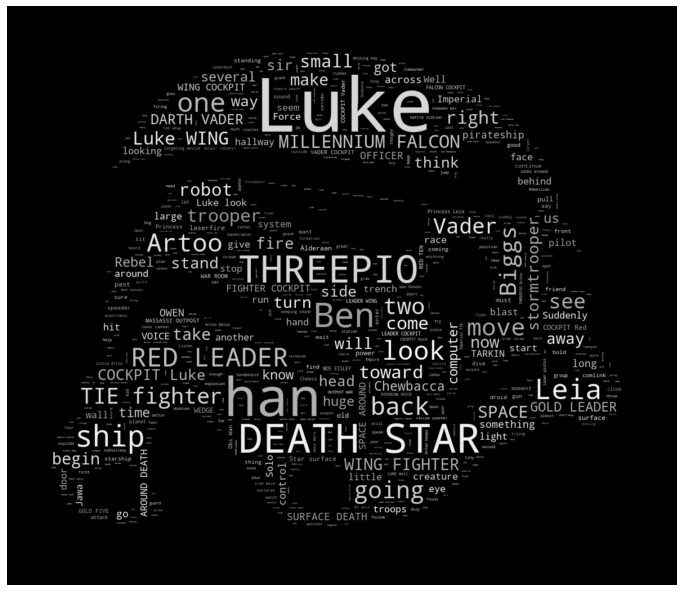

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

### 8-4 육아휴직 관련 법안에 대한 분석

이번 절은 Lucy Park 님의 KoNLPy가 내장하고 있는 법률 문서 중 하나를 가지고 기초적인 분석을 해보는 튜토리얼을 아주 미세한 부분 일부를 수정해서 학습하는 내용이다.

먼저 nltk를 import하고 KoNLPy의 내부 문서 중 육아휴직 관련 법안 을 읽는다.

In [26]:
import nltk

In [27]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [30]:
doc_ko[:100]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이'

이 문서를 Twitter 분석기로 명사 분석을 하겠다.

In [31]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\student\Anaconda3\envs\camp\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

수집된 단어의 횟수와 고유한 횟수를 확인한다.

In [32]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

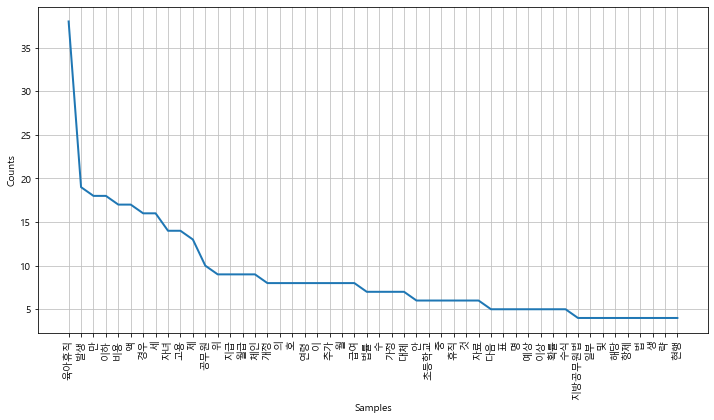

In [34]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

많이 등장한 순으로 plot해볼 수 있다. 당연하겠지만 '육아휴직'이라는 단어가 많이 등장했다. 의미없는 단어도 보인다. 한글은 영어와 달리 stopwords를 지정하기 쉽지 않다. 그래서 case-by-case로 지정합니다.

In [35]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

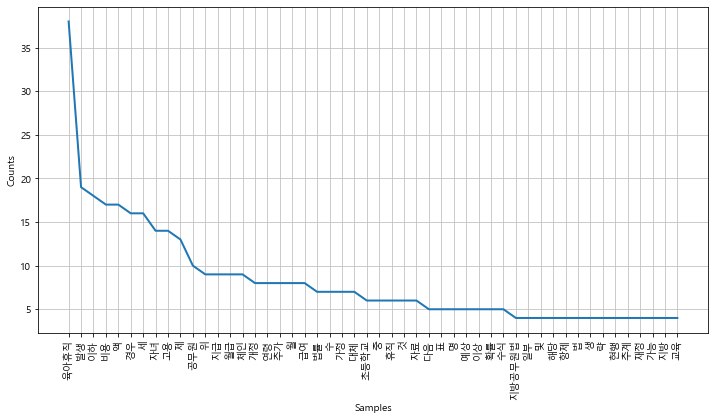

In [36]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [37]:
ko.count('초등학교')

6

어떠한 단어가 문서 내에서 몇 번 언급되었는지 확인할 수 있다.

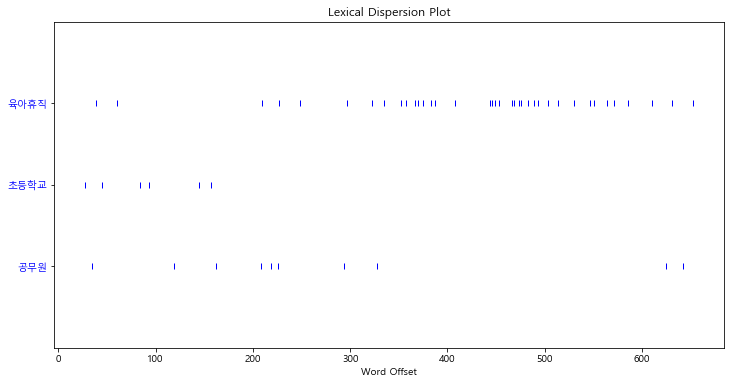

In [38]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

In [39]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [40]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


원하는 단어의 주변부 단어까지 같이 확인할 수 있었다.
그리고 앞 절에서 학습한 워드 클라우드를 적용해 보자.

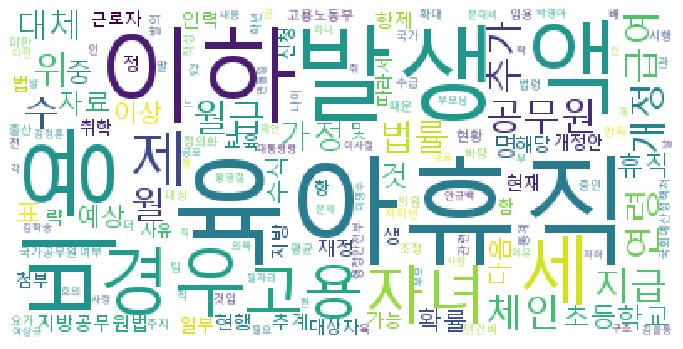

In [45]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 8-5 Naive Bayes Classifier 의 이해 - 영문

긍정, 부정이라는 태그가 있다. i like you 는 긍정이지만 , you like me는 부정이다. 

In [46]:
from nltk.tokenize import word_tokenize
import nltk

In [47]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [50]:
all_words = set(word.lower() for sentence in train 
                                                            for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [51]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'her': False,
   'hate': False,
   'i': True,
   'me': False,
   'you': True,
   'like': True},
  'pos'),
 ({'her': False,
   'hate': True,
   'i': True,
   'me': False,
   'you': True,
   'like': False},
  'neg'),
 ({'her': False,
   'hate': False,
   'i': False,
   'me': True,
   'you': True,
   'like': True},
  'neg'),
 ({'her': True,
   'hate': False,
   'i': True,
   'me': False,
   'you': False,
   'like': True},
  'pos')]

In [52]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


Naive Bayes 분류기를 이해하면 Train 문장에 붙은 긍정/부정 태그를 이용해서 분류한 결과 'hate'라는 단어가 없을 때 (False) 긍정 비율이 1.7:1 이라는 의미입니다.

In [53]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'her': False,
 'hate': False,
 'i': True,
 'me': False,
 'you': False,
 'like': True}

In [54]:
classifier.classify(test_sent_features)

'pos'

### 8-6 Naive Bayes Classifier의 이해

In [55]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [56]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [57]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [58]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'메리는': False,
   '마치고': False,
   '이쁜': False,
   '수업이': False,
   '고양이도': False,
   '좋아': True,
   '메리가': True,
   '지루해': False,
   '고양이야': False,
   '난': False,
   '메리랑': False,
   '놀거야': False},
  'pos'),
 ({'메리는': False,
   '마치고': False,
   '이쁜': False,
   '수업이': False,
   '고양이도': True,
   '좋아': True,
   '메리가': False,
   '지루해': False,
   '고양이야': False,
   '난': False,
   '메리랑': False,
   '놀거야': False},
  'pos'),
 ({'메리는': False,
   '마치고': False,
   '이쁜': False,
   '수업이': True,
   '고양이도': False,
   '좋아': False,
   '메리가': False,
   '지루해': True,
   '고양이야': False,
   '난': True,
   '메리랑': False,
   '놀거야': False},
  'neg'),
 ({'메리는': True,
   '마치고': False,
   '이쁜': True,
   '수업이': False,
   '고양이도': False,
   '좋아': False,
   '메리가': False,
   '지루해': False,
   '고양이야': True,
   '난': False,
   '메리랑': False,
   '놀거야': False},
  'pos'),
 ({'메리는': False,
   '마치고': True,
   '이쁜': False,
   '수업이': False,
   '고양이도': False,
   '좋아': False,
   '메리가': False,
   '지루해': False,
   '고양이야': False,
   '난'

In [59]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0


In [60]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [62]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'메리는': False,
 '마치고': False,
 '이쁜': False,
 '수업이': True,
 '고양이도': False,
 '좋아': False,
 '메리가': False,
 '지루해': False,
 '고양이야': False,
 '난': True,
 '메리랑': True,
 '놀거야': True}

### 8-7 문장의 유사도 측정하기

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [65]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [66]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [67]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [69]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

### 8-8 여자친구 선물 고르기

네이버의 지식인에서 여자친구 선물이라는 주제로 검색을 하고 그 검색 결과로 지금까지 학습한 몇몇 개념을 사용하려고 한다.

In [70]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [71]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [72]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    토파즈 반지   20대 남친 선물   쌈디 전여친 자살     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 여친선물 되게 다양하게 줄 수 있는데 생리전후에는 단... 제품줘도 여친선물로 괜찮을거 같더라구요! 생리기간엔... 안심하고 여친선물 주기에 좋은걸로 추천해용! 꼭...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06.   20대중후반 여친선물을 하려고하는데요 파우더로 하려고해요 그... 솜있는거... 암튼 피부는 굉장히 좋은편이구요 윤기도 있고.. 하얀편이에요 파우더도 바르고요 어떤...   답변 입생로랑 입술바르는거 17.19호 가격대 무난하고 자주쓰는거라 소모가 빨라서 좋아요 고려해보삼 다이아로티하트 목걸이 추천합니다 7만원이고 다이아몬드...      ',
 '  질문  윤아 선글라스 여친 선물로 사주려고 하는데요   2018.07.10.   선

In [75]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자스킨로션추천   여자30대선물   에센스추천   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동   여자친구100일선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 뭐 주는 게 좋을까요   2019.05.16.   얼마 안 있으면 기념일이라 여자친구선물로 줄 거 찾고 있는데요. 막 다이소 이런 데서... 여자친구선물로 받으면 좋은 거 써 주세요. 웬만하면 여자친구에게 직접 선물하셨던...   답변 여자친구선물 고민하시는 거면 좋은거... 저도 예전에 여자친구선물로 줬던 건데 너무 좋아하더라구요... 또 여자친구선물로 드리는 거다 보니까 부작용이나 효과 이런...      ',
 '  질문  여자친구선물 뭐가 좋을까요?   2019.05.08.   곧 있으면 여자친구가 생일이여서요. 여자친구선물 어떤걸 해주면 좋을지 고민과 걱정이 됩니다. 비싼걸 해주면 여자친구가 뭐라 할거 같은데… 여자친구선물 뭐가 좋을까요??   답변 질문자님께서 여자친구선물 관련하여 찾아보시는... 해줬던 여자친구선물을 알려드리려 합니다. 평소... 걸로 여자친구선물을 해주고 싶어서 알아보다 보니...      ',
 '  질문  20대후반 여자친구 선물입니다   2019.05.27.   20대후반 여자친구 선물입니다 디디에두보에서 목걸이사려고하는데요 어떤 것이 더 이쁜가요?   답변 받으시는분 취향에 따라 다를거같습니다. 둘다 이쁩니다. 투톤을 좋아하면 후자 그냥 무난하면 전자입니다. 이쁜목거리네요 부럽습니다 .ㅎ 아래가.심플하니.예뻐요!!!!!...      ',

In [76]:
len(present_candi_text)

7713

In [77]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\student\Anaconda3\envs\camp\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [79]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [80]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '스킨로션',
 '추천',
 '여자',
 '30',
 '대',
 '선물',
 '에센스',
 '추천',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '뭐',
 '주는',
 '게',
 '좋을까요',
 '2019.05',
 '.',
 '16',
 '.',
 '얼마',
 '안',
 '있으면',
 '기념일',
 '이라',
 '여자친구',
 '선물',
 '로',
 '줄',
 '거',
 '찾고',
 '있는데요',
 '.',
 '막',
 '다이소',
 '이런',
 '데',
 '서',
 '...',
 '여자친구',
 '선물',
 '로',
 '받으면',
 '좋은',
 '거',
 '

In [81]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

532700
401


In [82]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 40336),
 ('여자친구', 37963),
 ('.', 21355),
 ('...', 18388),
 ('로', 15423),
 ('가', 9489),
 ('대', 9489),
 ('이', 8895),
 ('추천', 7118),
 ('질문', 7117),
 ('답변', 6524),
 ('20', 5337),
 ('30', 4745),
 ('것', 4744),
 ('화장품', 4744),
 ('을', 4151),
 ('거', 3563),
 ('?', 3559),
 ('고민', 3559),
 ('도', 3559),
 ('단어', 2970),
 ('좋은', 2967),
 ('한', 2966),
 ('는', 2966),
 ('에', 2966),
 ('요', 2965),
 ('검색', 2376),
 ('하는', 2375),
 ('를', 2375),
 ('여자', 2375),
 ('때', 2374),
 ('생일', 2373),
 ('100일', 2373),
 ('뭐', 2373),
 ('있으면', 2373),
 ('줄', 2373),
 ('면', 2373),
 ('저', 2373),
 ('어떤', 2372),
 ('걸', 2372),
 ('만', 2372),
 ('하는데', 2372),
 ('인데', 2372),
 ('피부', 2372),
 (',', 2372),
 ('향수', 2372),
 ('입력', 1782),
 ('이런', 1781),
 ('합니다', 1780),
 ('좋을까요', 1780),
 ('2019.05', 1780),
 ('입니다', 1779),
 ('들', 1779),
 ('많이', 1779),
 ('으로', 1779),
 ('좀', 1779),
 ('포함', 1188),
 ('의', 1188),
 ('연관검색어', 1188),
 ('기', 1187),
 ('할', 1187),
 ('목걸이', 1187),
 ('후', 1187),
 ('유지', 1187),
 ('됩니다', 1187),
 ('서', 1187),
 ('너무', 1187)

In [83]:
ko.similar('여자친구')

In [84]:

stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 40336),
 ('여자친구', 37963),
 ('추천', 7118),
 ('30', 4745),
 ('화장품', 4744),
 ('고민', 3559),
 ('좋은', 2967),
 ('검색', 2376),
 ('여자', 2375),
 ('생일', 2373),
 ('100일', 2373),
 ('있으면', 2373),
 ('면', 2373),
 ('저', 2373),
 ('걸', 2372),
 ('만', 2372),
 ('하는데', 2372),
 ('피부', 2372),
 ('향수', 2372),
 ('입력', 1782),
 ('이런', 1781),
 ('합니다', 1780),
 ('좋을까요', 1780),
 ('2019.05', 1780),
 ('입니다', 1779),
 ('많이', 1779),
 ('포함', 1188),
 ('연관검색어', 1188),
 ('기', 1187),
 ('목걸이', 1187),
 ('유지', 1187),
 ('됩니다', 1187),
 ('서', 1187),
 ('너무', 1187),
 ('이나', 1187),
 ('해주면', 1186),
 ('비싼', 1186),
 ('같은데', 1186),
 ('??', 1186),
 ('후반', 1186),
 ('분', 1186),
 ('04', 1186),
 ('여친', 1186),
 ('준비', 1186),
 ('중이', 1186),
 ('하려고', 1186),
 ('100', 1186),
 ('전', 1186),
 ('라면', 1186),
 ('2019.01', 1186)]

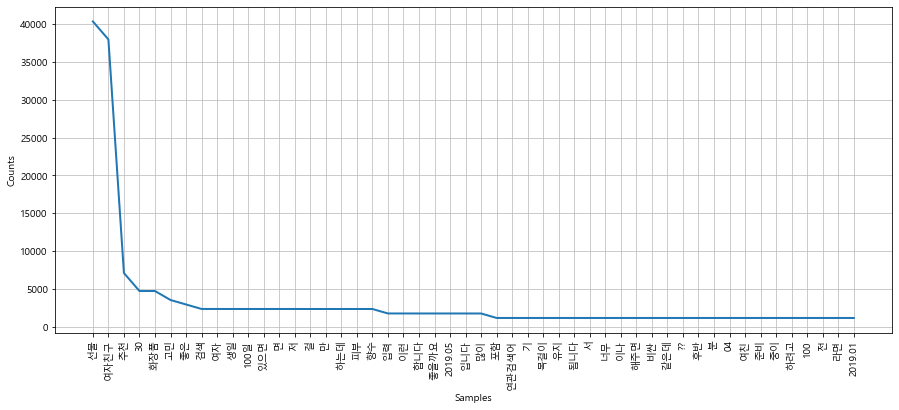

In [85]:

plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [87]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

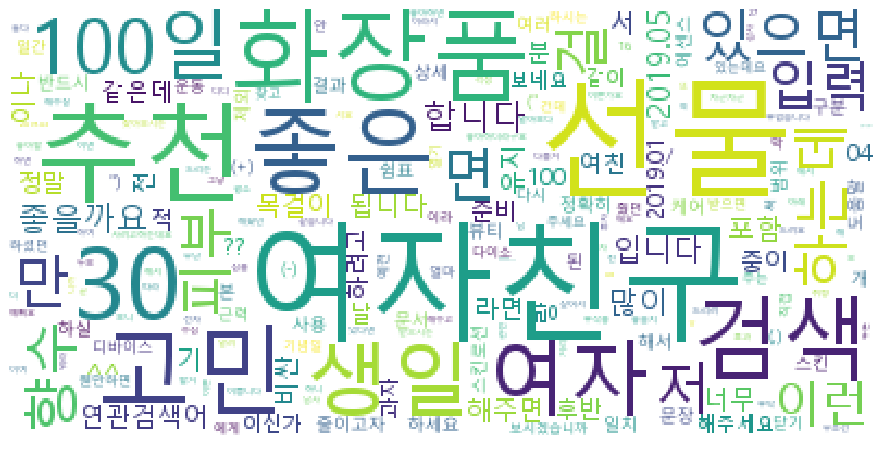

In [93]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [96]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [99]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

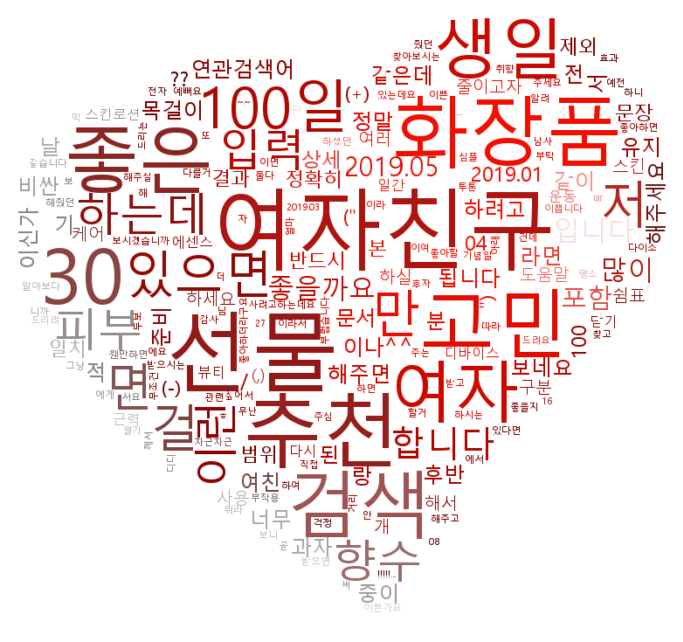

In [102]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()